## Vowels in Verbmobil: numbers
Here we characterize vowels of the Verbmobil corpus in terms of duration-related data.

In [1]:
# Here I import all python modules needed
import model_utilities
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

Static data to be used:

In [2]:
# Here you may point to the dataset you wish to analyse. Just replace the string with your absolute path
#dataset_path = model_utilities.get_path_list("C:/Users/alexutza_a/Abschlussarbeit/DB_Verbmobil/verbmobil_par")
dp1 = model_utilities.get_path_list("C:/Users/alexutza_a/Abschlussarbeit/DB_Verbmobil/Evaluation/Rest")
dp2 = model_utilities.get_path_list("C:/Users/alexutza_a/Abschlussarbeit/DB_Verbmobil/mod_dataset")
dataset_path = dp2 + dp1

# A dictionary of classes of phonemes to use later
ptype_dict = {"diphthong" : ["aU", "aI", "OY"], "long_vowels" : ["a:", "a~:", "e:", "E:", "i:", "o:", "u:", "y:", "2:"],
              "short_vowels" : ["a", "a~", "e", "E", "I", "i", "O", "o", "U", "u", "Y", "y", "9", "2"], "schwa" : ["@", "6"],
              "plosive" : ["b", "d", "p", "t", "k", "g"], "fricative" : ["f", "v", "s", "S", "z", "Z", "x", "h", "C"],
              "nasal" : ["m", "n", "N"], "lateral" : ["l"], "approximant" : ["j"], "other" : [ "Q", "r"]}

# List of vowels
vowel_list = ["a", "a~", "e", "E", "I", "i", "O", "o", "U", "u", "Y", "y", "9", "2", "a:", "a~:", "e:", "E:", "i:", 
              "o:", "u:", "y:", "2:", "OY", "aU", "aI", "@", "6"]

# Path for saving pictures
fig_path = "C:/Users/alexutza_a/Abschlussarbeit/Grafiken/Vowels"

The following dictionary contains rather few features, as it is only meant for the above specified purpose.<br />
On the other hand, it takes a rather short time to build, even with very large databases.

In [3]:
# This is a dictionary of all phonemes in the dataset used, containing their durations and filename
# Looks like: {"a" : [1599, g001a_acn1_AAJ.par, 2348, g001a_acn1_AAJ.par, 959, ...], 
#              "b" : [...], ...}
# Calculate dictionary once, use it then many times ;)
%time phon_dur_dict = model_utilities.dur_dict_filename(dataset_path)

Wall time: 2min 37s


### Overall statistics on vowels: dirty data

Total vowels: 236681
Minimum duration: 0.03 sec
Maximum duration: 2.81 sec
Q1: 0.04 sec
Mean duration: 0.09 sec
Median duration: 0.07 sec
Q3: 0.11 sec
Standard deviation: 0.07 sec


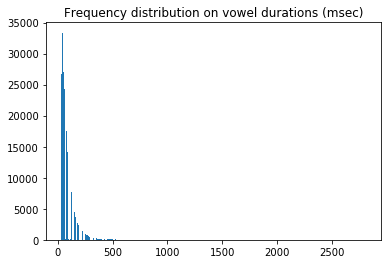

Length of cleaned list: 193167


In [4]:
# Create list of all vowel durations from the DB
vdur_list = []
for key in phon_dur_dict.keys():
    if key in vowel_list:
        vl = phon_dur_dict[key][::2]
        vdur_list += vl

# Statistic data on vowel durations
print("Total vowels: " + str(len(vdur_list)))
print("Minimum duration: " + str(round(min(vdur_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(vdur_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(vdur_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(vdur_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(vdur_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(vdur_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(vdur_list)*0.0000625, 2)) + " sec")

# Histogram of vowel duration
vdur_msec = [ x*0.0625 for x in vdur_list]
plt.hist(vdur_msec, bins = 500)
plt.title("Frequency distribution on vowel durations (msec)")
plt.show()

vowel_clean = [x for x in vdur_list if x <= 2000]
print("Length of cleaned list: " + str(len(vowel_clean)))

### 1. Diphthongs
<br \>
<font size = 3>
<strong>German knows officially 3 diphthongs: </strong>
<ol>
    <li><b>/aI/</b>: &emsp;&ensp;<font face="courier new">/laIt@/</font> leite</li>
    <li><b>/aU/</b>: &emsp;<font face="courier new">/laUt@/</font> Laute</li>
    <li><b>/OY/</b>: &ensp;&nbsp;<font face="courier new">/lOYt@/</font> Leute</li>
</ol>
</font>

Here overall statistic data on diphthong duration:

In [5]:
# List of durations for /aI/, /aU/, and /OY/.
diph_list = []
for diph in ptype_dict["diphthong"]:
    diph_list += phon_dur_dict[diph][::2]
print("Total occurencies of normal diphthongs: " + str(len(diph_list)))

Total occurencies of normal diphthongs: 19502


In [44]:
# Eliminate upper and lower 1% datapoints
diph1_list = []
for diph in ptype_dict["diphthong"]:
    dls = sorted(phon_dur_dict[diph][::2])
    out = int(len(dls)*1.0//100)
    diph1_list += dls[out:len(dls)-out]
print("Total occurencies of diphthongs: " + str(len(diph1_list)))

Total occurencies of diphthongs: 19116


Total diphthongs: 19502
Minimum duration: 0.04 sec
Maximum duration: 1.05 sec
Q1: 0.08 sec
Mean duration: 0.13 sec
Median duration: 0.11 sec
Q3: 0.16 sec
Standard deviation: 0.06 sec


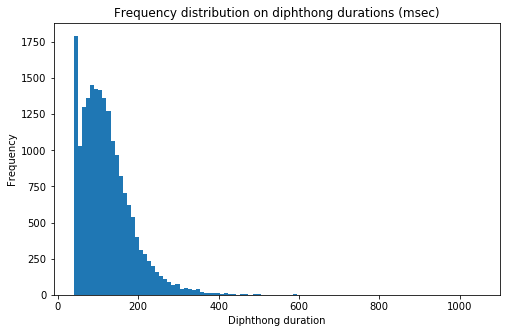

In [75]:
# Statistic data on diphthong durations
print("Total diphthongs: " + str(len(diph_list)))
print("Minimum duration: " + str(round(min(diph_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(diph_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(diph_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(diph_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(diph_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(diph_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(diph_list)*0.0000625, 2)) + " sec")

# Histogram of diphthong duration
diph_msec = [ x*0.0625 for x in diph_list]
plt.figure(figsize=(8, 5))
plt.hist(diph_msec, bins = 100)
plt.title("Frequency distribution on diphthong durations (msec)")
plt.xlabel("Diphthong duration")
plt.ylabel("Frequency")
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.savefig(fig_path+"/Diph_all.png")
plt.show()

Total diphthongs: 19116
Minimum duration: 0.04 sec
Maximum duration: 0.35 sec
Q1: 0.08 sec
Mean duration: 0.12 sec
Median duration: 0.11 sec
Q3: 0.16 sec
Standard deviation: 0.06 sec


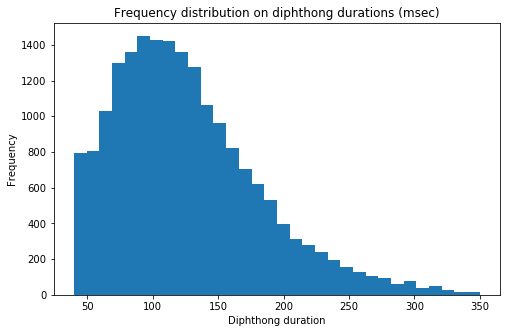

In [76]:
# Statistic data on diphthong durations
print("Total diphthongs: " + str(len(diph1_list)))
print("Minimum duration: " + str(round(min(diph1_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(diph1_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(diph1_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(diph1_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(diph1_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(diph1_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(diph1_list)*0.0000625, 2)) + " sec")

# Histogram of diphthong duration
diph1_msec = [ x*0.0625 for x in diph1_list]
plt.figure(figsize=(8, 5))
plt.hist(diph1_msec, bins = 32)
plt.title("Frequency distribution on diphthong durations (msec)")
plt.xlabel("Diphthong duration")
plt.ylabel("Frequency")
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.savefig(fig_path+"/Diph_min1.png", format="png")
plt.show()

<u><big> Diphthongs, one at a time:</big></u>

Statistics for /aI/

Total occurencies of aI: 11862
Count of outliers (1.0%) = 118
Longest 10 durations:
[499.94, 539.94, 559.94, 589.94, 589.94, 589.94, 619.94, 649.94, 709.94, 1049.94]

Consolidating statistic data on aI for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:       11862               11626       11744         8897
1  Min value:        0.04                0.04        0.04         0.04
2        Q25:        0.08                0.08        0.08         0.07
3       Mean:        0.12                0.12        0.12         0.09
4     Median:        0.11                0.11        0.11         0.09
5        Q75:        0.15                0.15        0.15         0.12
6  Max value:        1.05                0.33        0.33         0.15
7   Std. dev:        0.06                0.05        0.05         0.03


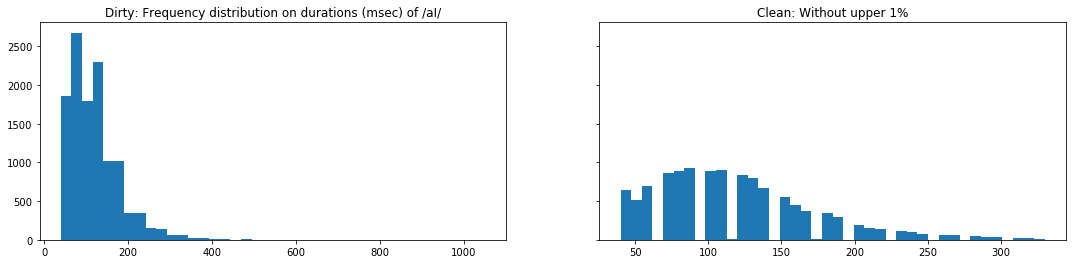

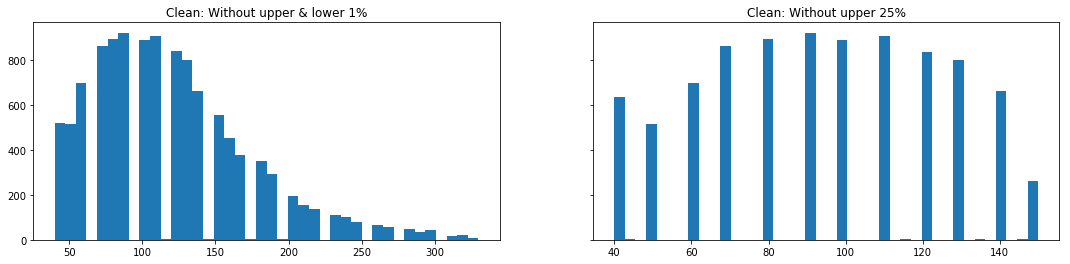

Statistics for /aU/

Total occurencies of aU: 6567
Count of outliers (1.0%) = 65
Longest 10 durations:
[459.94, 479.94, 479.94, 489.94, 499.94, 499.94, 509.94, 529.94, 599.94, 709.94]

Consolidating statistic data on aU for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:        6567                6437        6502         4926
1  Min value:        0.04                0.04        0.04         0.04
2        Q25:        0.08                0.08        0.08         0.07
3       Mean:        0.14                0.13        0.13          0.1
4     Median:        0.12                0.12        0.12          0.1
5        Q75:        0.17                0.17        0.17         0.13
6  Max value:        0.71                0.35        0.35         0.17
7   Std. dev:        0.07                0.06        0.06         0.04


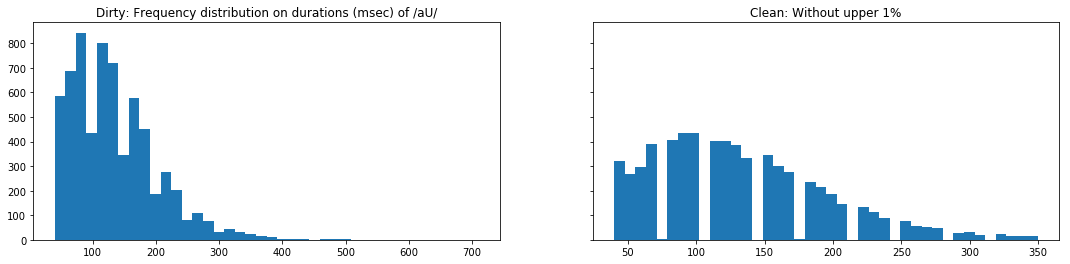

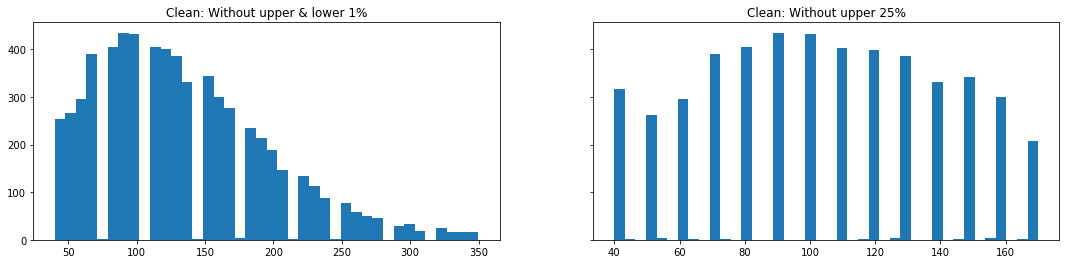

Statistics for /OY/

Total occurencies of OY: 1073
Count of outliers (1.0%) = 10
Longest 10 durations:
[239.94, 249.94, 249.94, 259.94, 259.94, 269.94, 269.94, 289.94, 289.94, 289.94]

Consolidating statistic data on OY for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:        1073                1053        1063          805
1  Min value:        0.04                0.04        0.04         0.04
2        Q25:        0.09                0.09        0.09         0.09
3       Mean:        0.12                0.12        0.12          0.1
4     Median:        0.12                0.12        0.12         0.11
5        Q75:        0.15                0.15        0.15         0.12
6  Max value:        0.29                0.24        0.24         0.15
7   Std. dev:        0.04                0.04        0.04         0.03


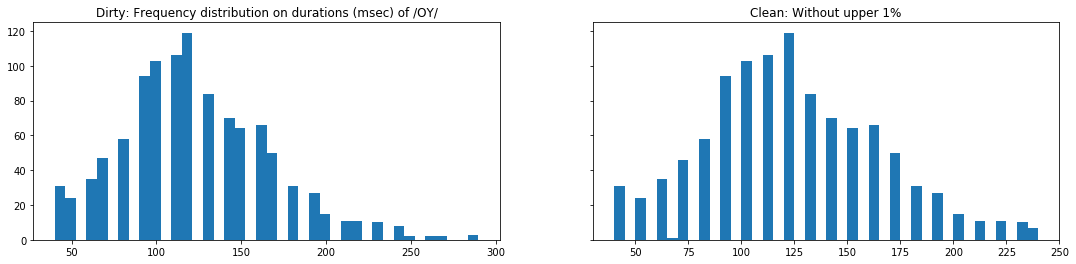

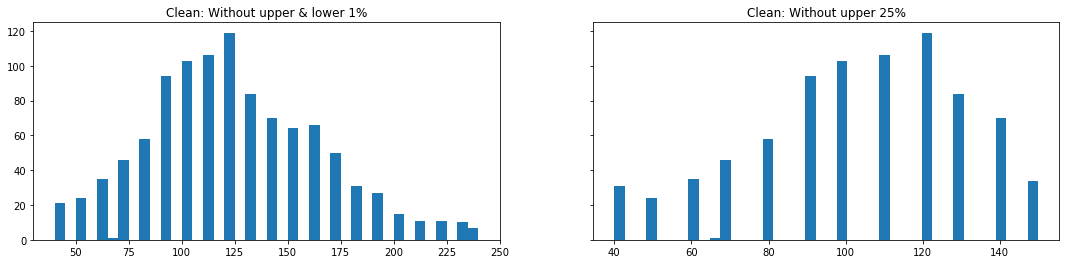

In [11]:
# List of diphthongs
diphthongs = ["aI", "aU", "OY"]

for diph in diphthongs:
    print("Statistics for /" + diph + "/\n")
    # List of all occurencies of given diphthong
    dur_list = phon_dur_dict[diph][::2]
    dur_list = [round(x*0.0625,2) for x in dur_list]
    print("Total occurencies of " + diph + ": " + str(len(dur_list)))
    
    # Counting 1% of data (for outliers)
    dur_sorted = sorted(dur_list)
    outliers1 = int(len(dur_list)*1.0//100)
    print("Count of outliers (1.0%) = " + str(outliers1) + "\nLongest 10 durations:")
    print(dur_sorted[-10:])
    # List of durations without the upper 1% of the data
    dur_minus1 = dur_sorted[:len(dur_list)-outliers1]
    
    # List of durations without upper and lower 1% of data (see no change to deleting only upper 1%)
    dur_uplow1 = dur_sorted[outliers1:len(dur_list)-outliers1]
    
    # Counting 25% of datapoints
    count25 = int(len(dur_list)*25//100)
    
    # List of durations without upper 25% of data
    dur75 = dur_sorted[:len(dur_list)-count25]
    
    # Consolidating statistic data on each diphthong for different amounts of data
    print("\nConsolidating statistic data on " + diph + " for different amounts of data.\nValues are given in seconds.")
    df = pd.DataFrame({
        'Data:': ["Count:", "Min value:", "Q25:", "Mean:", "Median:", "Q75:", "Max value:", "Std. dev:"],
        'Dirty (all)':[str(len(dur_list)), round(min(dur_list)/1000, 2), round(np.percentile(dur_list, 25)/1000, 2), 
                       round(np.mean(dur_list)/1000, 2), round(np.median(dur_list)/1000, 2), 
                       round(np.percentile(dur_list, 75)/1000, 2), round(max(dur_list)/1000, 2), 
                       round(np.std(dur_list)/1000, 2)],
        "No upper 1%":[str(len(dur_minus1)), round(min(dur_minus1)/1000, 2), round(np.percentile(dur_minus1, 25)/1000, 2), 
                       round(np.mean(dur_minus1)/1000, 2), round(np.median(dur_minus1)/1000, 2), 
                       round(np.percentile(dur_minus1, 75)/1000, 2), round(max(dur_minus1)/1000, 2), 
                       round(np.std(dur_minus1)/1000, 2)], 
        "No upper & lower 1%":[str(len(dur_uplow1)), round(min(dur_uplow1)/1000, 2), 
                               round(np.percentile(dur_uplow1, 25)/1000, 2), round(np.mean(dur_uplow1)/1000, 2), 
                               round(np.median(dur_uplow1)/1000, 2), round(np.percentile(dur_uplow1, 75)/1000, 2), 
                               round(max(dur_uplow1)/1000, 2), round(np.std(dur_uplow1)/1000, 2)], 
        "No upper 25%":[str(len(dur75)), round(min(dur75)/1000, 2), round(np.percentile(dur75, 25)/1000, 2), 
                        round(np.mean(dur75)/1000, 2), round(np.median(dur75)/1000, 2), 
                        round(np.percentile(dur75, 75)/1000, 2), round(max(dur75)/1000, 2), round(np.std(dur75)/1000, 2)]})
    df.style
    print(df)
    
    # Creating histograms for the 4 types of data selection for each diphthong
    f1, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.hist(dur_list, bins = 40)
    ax1.set_title("Dirty: Frequency distribution on durations (msec) of /" + diph + "/")
    ax2.hist(dur_minus1, bins = 40)
    ax2.set_title("Clean: Without upper 1%")
    f1.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=3)
    
    f2, (ax3, ax4) = plt.subplots(1, 2, sharey=True)
    ax3.hist(dur_uplow1, bins = 40)
    ax3.set_title("Clean: Without upper & lower 1%")
    ax4.hist(dur75, bins = 40)
    ax4.set_title("Clean: Without upper 25%")
    f2.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=3)
    
    plt.show()

### 2. Long vowels
<strong>2.1 German long vowels: /a:/, /a~:/, /e:/, /E:/, /i:/, /o:/, /u:/, /y:/, and /2:/</strong>

<i>Overall statistics</i>

In [12]:
# List of durations for /a:/, /a~:/, /e:/, /E:/, /i:/, /o:/, /u:/, /y:/, and /2:/.
longv_list = []
for longv in ptype_dict["long_vowels"]:
    longv_list += phon_dur_dict[longv][::2]
print("Total occurencies of long vowels: " + str(len(longv_list)))

Total occurencies of long vowels: 70940


In [79]:
# Eliminate upper and lower 1% datapoints
longv1_list = []
for lv in ptype_dict["long_vowels"]:
    lvls = sorted(phon_dur_dict[lv][::2])
    out = int(len(lvls)*1.0//100)
    longv1_list += lvls[out:len(lvls)-out]
print("Total occurencies of long vowels: " + str(len(longv1_list)))

Total occurencies of long vowels: 69528


Total long vowels: 70940
Minimum duration: 0.04 sec
Maximum duration: 2.81 sec
Q1: 0.06 sec
Mean duration: 0.11 sec
Median duration: 0.09 sec
Q3: 0.14 sec
Standard deviation: 0.09 sec


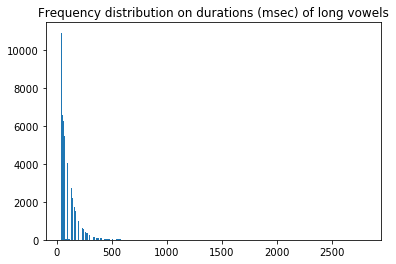

In [13]:
# Statistic data on durations of German long vowels
print("Total long vowels: " + str(len(longv_list)))
print("Minimum duration: " + str(round(min(longv_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(longv_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(longv_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(longv_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(longv_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(longv_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(longv_list)*0.0000625, 2)) + " sec")

# Histogram of long vowel duration
longw_msec = [ x*0.0625 for x in longv_list]
plt.hist(longw_msec, bins = 500)
plt.title("Frequency distribution on durations (msec) of long vowels")
plt.show()

Total long vowels: 69528
Minimum duration: 0.04 sec
Maximum duration: 0.79 sec
Q1: 0.06 sec
Mean duration: 0.11 sec
Median duration: 0.09 sec
Q3: 0.14 sec
Standard deviation: 0.08 sec


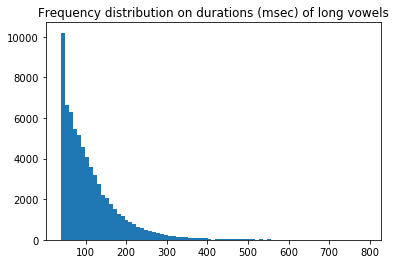

In [92]:
# Statistic data on durations of German long vowels
# Eliminated upper and lower 1% datapoints
print("Total long vowels: " + str(len(longv1_list)))
print("Minimum duration: " + str(round(min(longv1_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(longv1_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(longv1_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(longv1_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(longv1_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(longv1_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(longv1_list)*0.0000625, 2)) + " sec")

# Histogram of long vowel duration
longv1_msec = [ x*0.0625 for x in longv1_list]
plt.hist(longv1_msec, bins = 77)
plt.title("Frequency distribution on durations (msec) of long vowels")
plt.show()

<u><big> Long vowels, one at a time:</big></u>

Statistics for /a:/

Total occurencies of a:: 22522
Count of outliers (1.0%) = 225
Longest 10 durations:
[849.94, 859.94, 879.94, 899.94, 919.94, 1089.94, 1109.94, 1169.94, 1389.94, 2319.94]

Consolidating statistic data on a: for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:       22522               22072       22297        16892
1  Min value:        0.04                0.04        0.04         0.04
2        Q25:        0.07                0.07        0.07         0.06
3       Mean:        0.13                0.13        0.13         0.09
4     Median:        0.11                0.11        0.11         0.09
5        Q75:        0.17                0.17        0.17         0.12
6  Max value:        2.32                0.44        0.44         0.17
7   Std. dev:        0.09                0.08        0.08         0.04


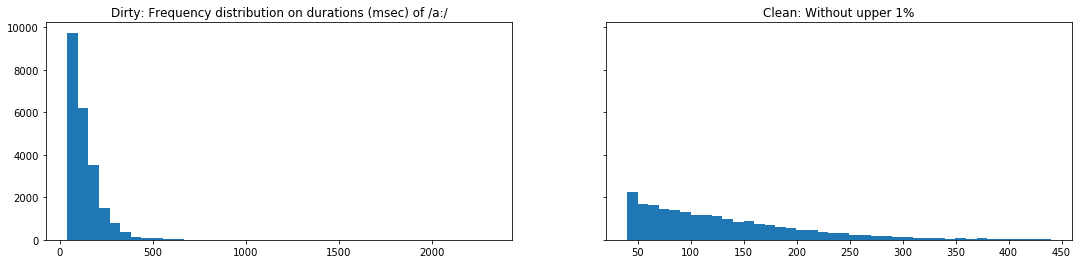

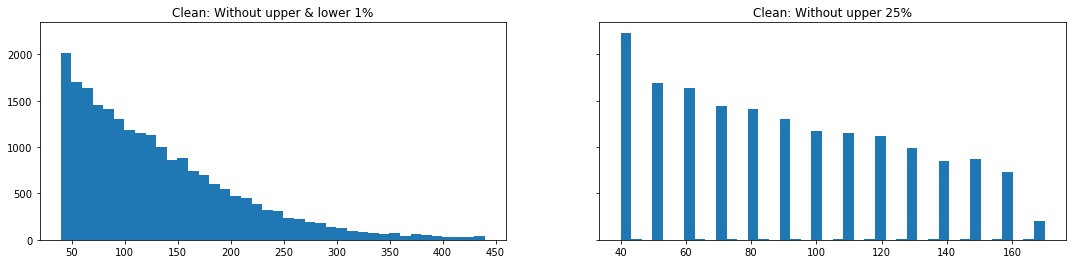

Statistics for /a~:/

Total occurencies of a~:: 127
Count of outliers (1.0%) = 1
Longest 10 durations:
[319.94, 319.94, 329.94, 329.94, 339.94, 339.94, 349.94, 459.94, 479.94, 509.94]

Consolidating statistic data on a~: for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:         127                 125         126           96
1  Min value:        0.04                0.04        0.04         0.04
2        Q25:        0.12                0.13        0.12         0.11
3       Mean:        0.18                0.18        0.18         0.14
4     Median:        0.17                0.17        0.17         0.14
5        Q75:        0.23                0.23        0.23         0.18
6  Max value:        0.51                0.48        0.48         0.23
7   Std. dev:        0.09                0.08        0.08         0.05


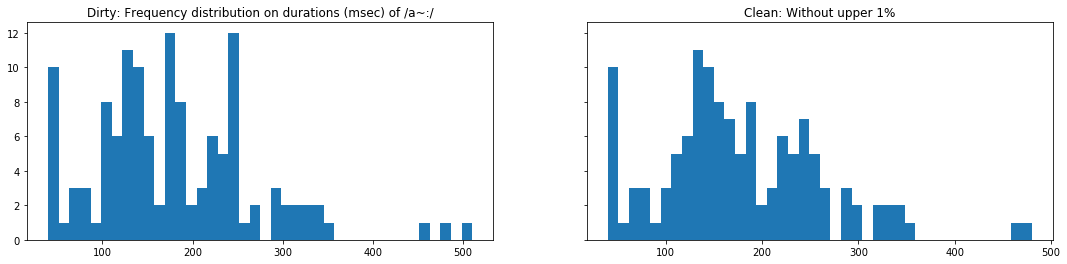

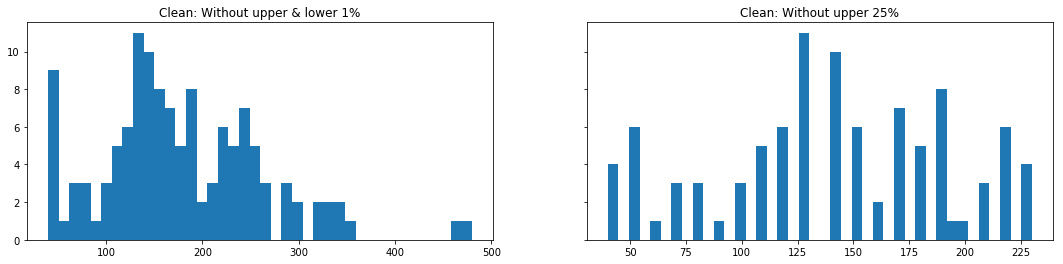

Statistics for /e:/

Total occurencies of e:: 11119
Count of outliers (1.0%) = 111
Longest 10 durations:
[529.94, 529.94, 549.94, 579.94, 589.94, 609.94, 639.94, 649.94, 729.94, 759.94]

Consolidating statistic data on e: for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:       11119               10897       11008         8340
1  Min value:        0.04                0.04        0.04         0.04
2        Q25:        0.05                0.05        0.05         0.05
3       Mean:        0.09                0.09        0.09         0.07
4     Median:        0.08                0.08        0.08         0.06
5        Q75:        0.12                0.11        0.11         0.09
6  Max value:        0.76                 0.3         0.3         0.12
7   Std. dev:        0.06                0.05        0.05         0.02


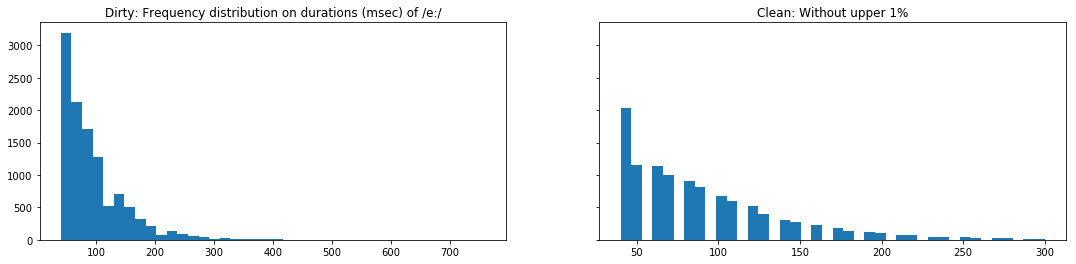

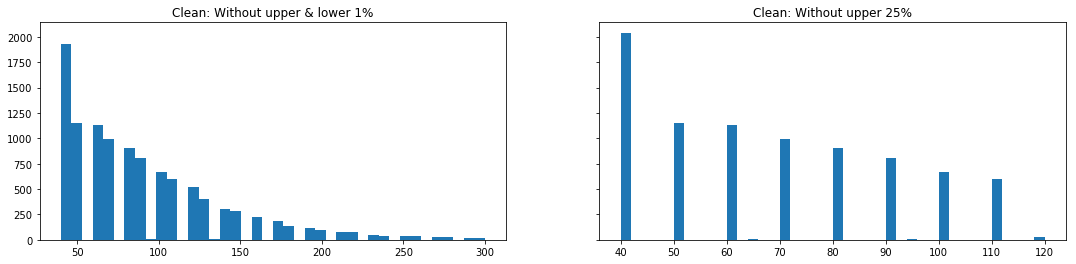

Statistics for /E:/

Total occurencies of E:: 5188
Count of outliers (1.0%) = 51
Longest 10 durations:
[1154.94, 1179.94, 1189.94, 1189.94, 1259.94, 1369.94, 1469.94, 1679.94, 1859.94, 2809.94]

Consolidating statistic data on E: for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:        5188                5086        5137         3891
1  Min value:        0.04                0.04        0.04         0.04
2        Q25:        0.09                0.09        0.09         0.07
3       Mean:        0.21                 0.2         0.2         0.13
4     Median:        0.17                0.17        0.17         0.13
5        Q75:        0.27                0.27        0.27         0.19
6  Max value:        2.81                0.79        0.79         0.27
7   Std. dev:        0.17                0.14        0.14         0.07


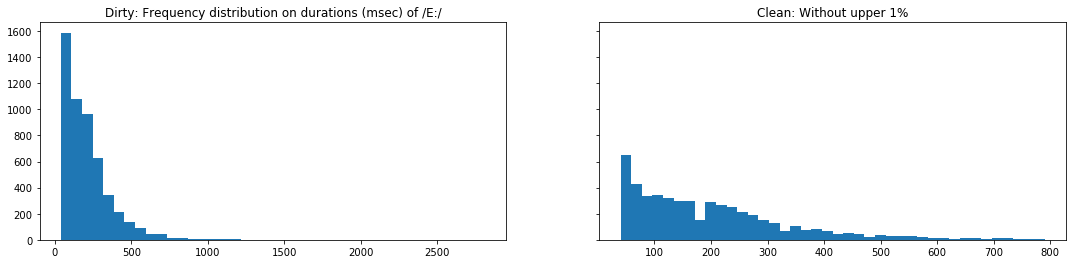

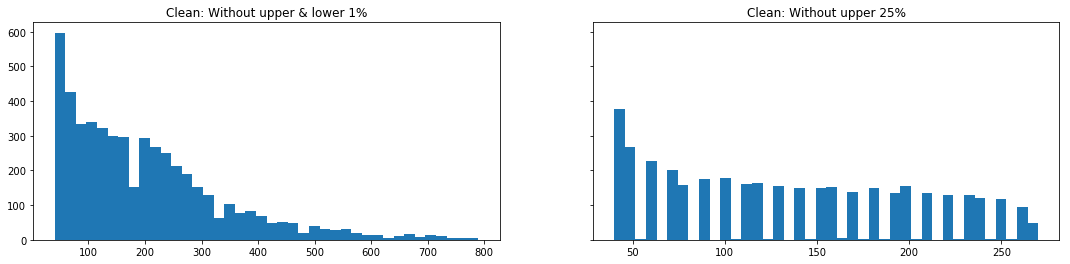

Statistics for /i:/

Total occurencies of i:: 15303
Count of outliers (1.0%) = 153
Longest 10 durations:
[509.94, 509.94, 519.94, 529.94, 549.94, 629.94, 639.94, 679.94, 679.94, 709.94]

Consolidating statistic data on i: for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:       15303               14997       15150        11478
1  Min value:        0.04                0.04        0.04         0.04
2        Q25:        0.05                0.05        0.05         0.04
3       Mean:        0.08                0.08        0.08         0.06
4     Median:        0.07                0.07        0.06         0.06
5        Q75:        0.09                0.09        0.09         0.07
6  Max value:        0.71                0.29        0.29         0.09
7   Std. dev:        0.05                0.04        0.04         0.02


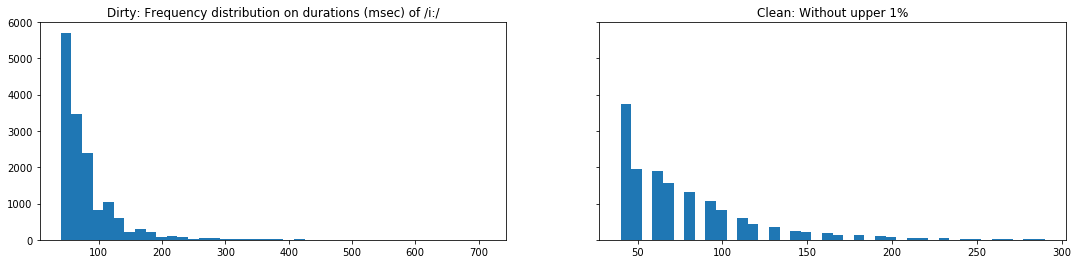

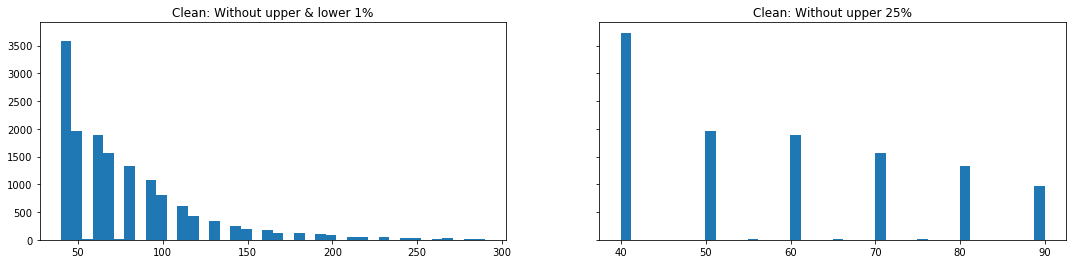

Statistics for /o:/

Total occurencies of o:: 7178
Count of outliers (1.0%) = 71
Longest 10 durations:
[619.94, 629.94, 659.94, 689.94, 729.94, 739.94, 749.94, 789.94, 809.94, 969.94]

Consolidating statistic data on o: for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:        7178                7036        7107         5384
1  Min value:        0.04                0.04        0.04         0.04
2        Q25:        0.06                0.06        0.06         0.05
3       Mean:        0.11                 0.1         0.1         0.08
4     Median:        0.09                0.09        0.09         0.08
5        Q75:        0.13                0.13        0.13          0.1
6  Max value:        0.97                0.34        0.34         0.13
7   Std. dev:        0.07                0.06        0.06         0.03


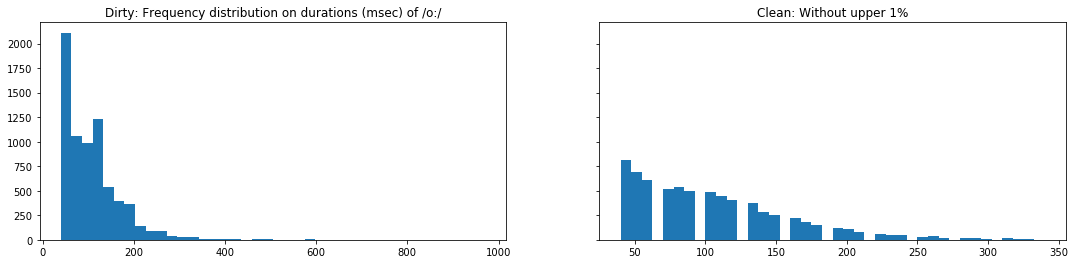

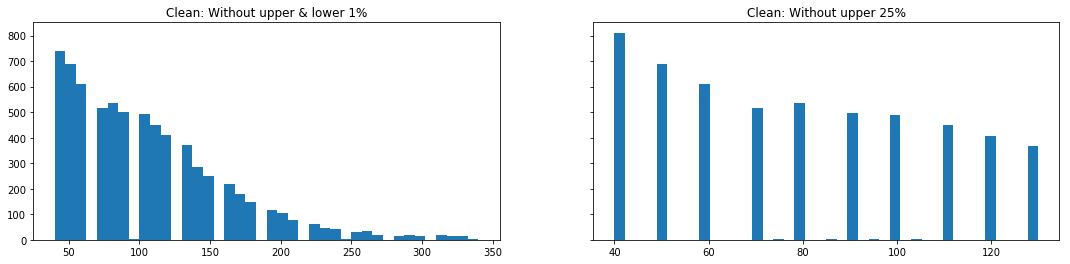

Statistics for /u:/

Total occurencies of u:: 7010
Count of outliers (1.0%) = 70
Longest 10 durations:
[429.94, 439.94, 449.94, 459.94, 479.94, 479.94, 529.94, 569.94, 599.94, 639.94]

Consolidating statistic data on u: for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:        7010                6870        6940         5258
1  Min value:        0.04                0.04        0.04         0.04
2        Q25:        0.06                0.06        0.06         0.05
3       Mean:         0.1                 0.1         0.1         0.08
4     Median:        0.09                0.09        0.09         0.08
5        Q75:        0.13                0.13        0.13          0.1
6  Max value:        0.64                0.29        0.29         0.13
7   Std. dev:        0.06                0.05        0.05         0.03


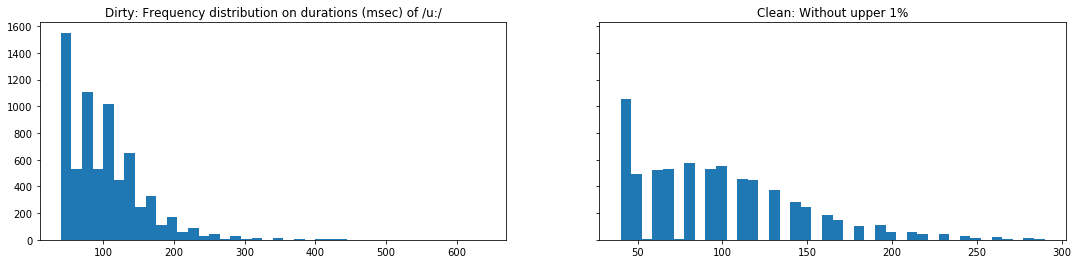

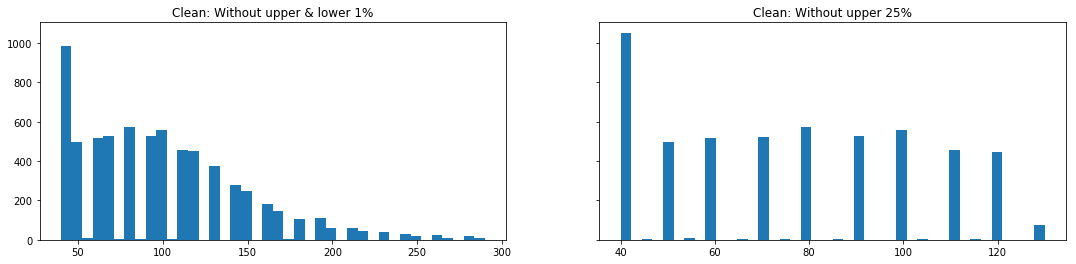

Statistics for /y:/

Total occurencies of y:: 1626
Count of outliers (1.0%) = 16
Longest 10 durations:
[249.94, 259.94, 259.94, 259.94, 269.94, 279.94, 279.94, 279.94, 349.94, 399.94]

Consolidating statistic data on y: for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:        1626                1594        1610         1220
1  Min value:        0.04                0.04        0.04         0.04
2        Q25:        0.04                0.04        0.04         0.04
3       Mean:        0.07                0.07        0.07         0.05
4     Median:        0.06                0.06        0.06         0.05
5        Q75:        0.09                0.09        0.09         0.06
6  Max value:         0.4                0.22        0.22         0.09
7   Std. dev:        0.04                0.04        0.04         0.02


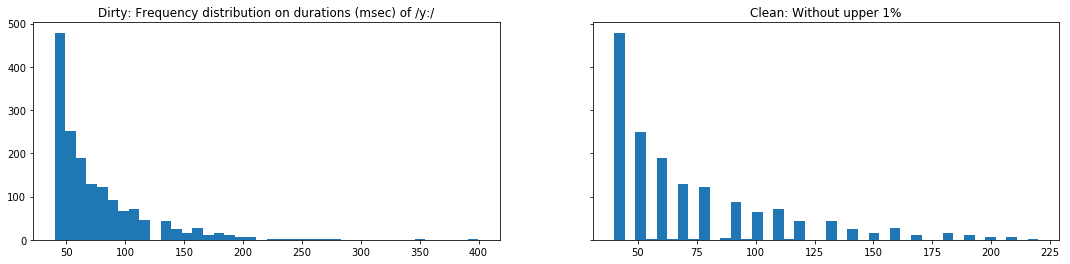

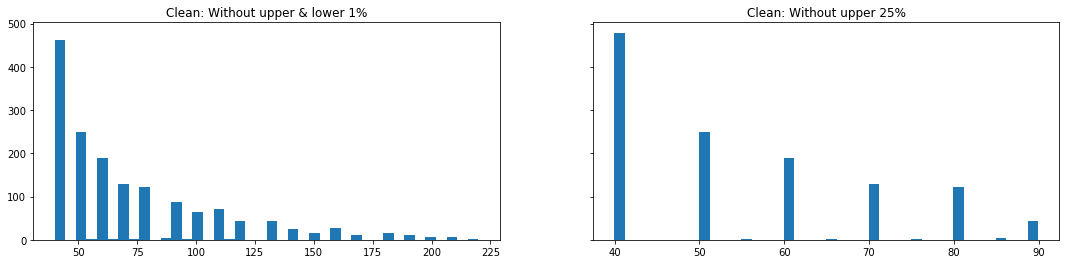

Statistics for /2:/

Total occurencies of 2:: 867
Count of outliers (1.0%) = 8
Longest 10 durations:
[239.94, 239.94, 269.94, 269.94, 279.94, 299.94, 309.94, 319.94, 319.94, 619.94]

Consolidating statistic data on 2: for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:         867                 851         859          651
1  Min value:        0.04                0.04        0.04         0.04
2        Q25:        0.05                0.05        0.05         0.05
3       Mean:        0.09                0.09        0.09         0.07
4     Median:        0.08                0.08        0.08         0.07
5        Q75:        0.11                0.11        0.11         0.09
6  Max value:        0.62                0.24        0.24         0.11
7   Std. dev:        0.05                0.04        0.04         0.02


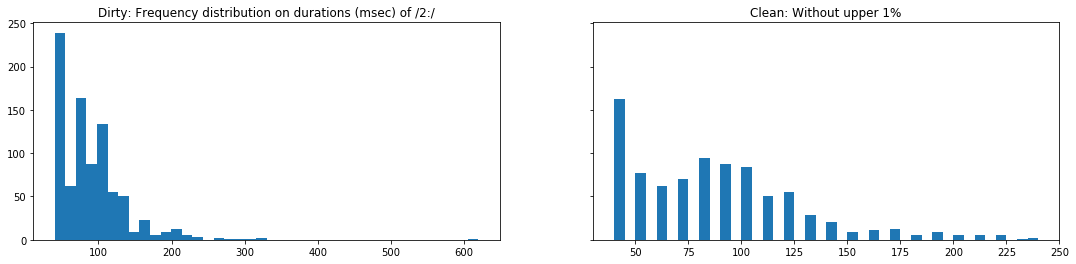

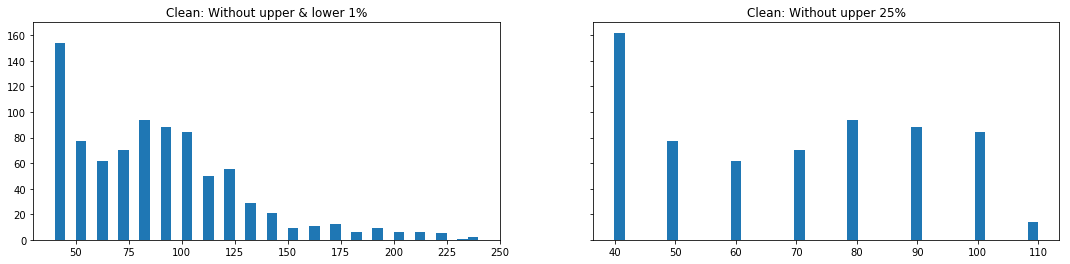

In [14]:
# List of long vowels
long_vowels = ["a:", "a~:", "e:", "E:", "i:", "o:", "u:", "y:", "2:"]

for longv in long_vowels:
    print("Statistics for /" + longv + "/\n")
    # List of all occurencies of given long vowel
    dur_list = phon_dur_dict[longv][::2]
    dur_list = [round(x*0.0625,2) for x in dur_list]
    print("Total occurencies of " + longv + ": " + str(len(dur_list)))
    
    # Counting 1% of data (for outliers)
    dur_sorted = sorted(dur_list)
    outliers1 = int(len(dur_list)*1.0//100)
    print("Count of outliers (1.0%) = " + str(outliers1) + "\nLongest 10 durations:")
    print(dur_sorted[-10:])
    # List of durations without the upper 1% of the data
    dur_minus1 = dur_sorted[:len(dur_list)-outliers1]
    
    # List of durations without upper and lower 1% of data (see no change to deleting only upper 1%)
    dur_uplow1 = dur_sorted[outliers1:len(dur_list)-outliers1]
    
    # Counting 25% of datapoints
    count25 = int(len(dur_list)*25//100)
    
    # List of durations without upper 25% of data
    dur75 = dur_sorted[:len(dur_list)-count25]
    
    # Consolidating statistic data on each diphthong for different amounts of data
    print("\nConsolidating statistic data on " + longv + " for different amounts of data.\nValues are given in seconds.")
    df = pd.DataFrame({
        'Data:': ["Count:", "Min value:", "Q25:", "Mean:", "Median:", "Q75:", "Max value:", "Std. dev:"],
        'Dirty (all)':[str(len(dur_list)), round(min(dur_list)/1000, 2), round(np.percentile(dur_list, 25)/1000, 2), 
                       round(np.mean(dur_list)/1000, 2), round(np.median(dur_list)/1000, 2), 
                       round(np.percentile(dur_list, 75)/1000, 2), round(max(dur_list)/1000, 2), 
                       round(np.std(dur_list)/1000, 2)],
        "No upper 1%":[str(len(dur_minus1)), round(min(dur_minus1)/1000, 2), round(np.percentile(dur_minus1, 25)/1000, 2), 
                       round(np.mean(dur_minus1)/1000, 2), round(np.median(dur_minus1)/1000, 2), 
                       round(np.percentile(dur_minus1, 75)/1000, 2), round(max(dur_minus1)/1000, 2), 
                       round(np.std(dur_minus1)/1000, 2)], 
        "No upper & lower 1%":[str(len(dur_uplow1)), round(min(dur_uplow1)/1000, 2), 
                               round(np.percentile(dur_uplow1, 25)/1000, 2), round(np.mean(dur_uplow1)/1000, 2), 
                               round(np.median(dur_uplow1)/1000, 2), round(np.percentile(dur_uplow1, 75)/1000, 2), 
                               round(max(dur_uplow1)/1000, 2), round(np.std(dur_uplow1)/1000, 2)], 
        "No upper 25%":[str(len(dur75)), round(min(dur75)/1000, 2), round(np.percentile(dur75, 25)/1000, 2), 
                        round(np.mean(dur75)/1000, 2), round(np.median(dur75)/1000, 2), 
                        round(np.percentile(dur75, 75)/1000, 2), round(max(dur75)/1000, 2), round(np.std(dur75)/1000, 2)]})
    df.style
    print(df)
    
    # Creating histograms for the 4 types of data selection for each diphthong
    f1, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.hist(dur_list, bins = 40)
    ax1.set_title("Dirty: Frequency distribution on durations (msec) of /" + longv + "/")
    ax2.hist(dur_minus1, bins = 40)
    ax2.set_title("Clean: Without upper 1%")
    f1.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=3)
    
    f2, (ax3, ax4) = plt.subplots(1, 2, sharey=True)
    ax3.hist(dur_uplow1, bins = 40)
    ax3.set_title("Clean: Without upper & lower 1%")
    ax4.hist(dur75, bins = 40)
    ax4.set_title("Clean: Without upper 25%")
    f2.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=3)
    
    plt.show()

### 3. Schwa<br \>

<font size = 3>
<strong>German has 2 central / reduced vowels (schwa): </strong>

<ol>
    <li><b>/@/</b>: &emsp;<font face="courier new">/le:z@n/</font> lesen, and </li>
    <li><b>/6/</b>: &emsp;<font face="courier new">/le:z6/</font> Leser </li>
</ol>
<br \>
They represent the most frequent phoneme group in the German language. They are also called reduced vowels, because practically any monophthong vowel may be realised as schwa.

<p><b>Characteristic:</b> only occur in unstressed syllables.</p>

<br />
<i>Overall statistics</i>
</font>

In [15]:
# List of durations for /@/ and /6/.
schwa_list = []
for schwa in ptype_dict["schwa"]:
    schwa_list += phon_dur_dict[schwa][::2]
print("Total occurencies of schwa: " + str(len(schwa_list)))

Total occurencies of schwa: 50496


In [93]:
# Eliminate upper and lower 1% datapoints
schwa1_list = []
for schwa in ptype_dict["schwa"]:
    sls = sorted(phon_dur_dict[schwa][::2])
    out = int(len(sls)*1.0//100)
    schwa1_list += sls[out:len(sls)-out]
print("Total occurencies of schwa: " + str(len(schwa1_list)))

Total occurencies of schwa: 49488


Total occurences: 50496
Minimum duration: 0.03 sec
Maximum duration: 1.68 sec
Q1: 0.04 sec
Mean duration: 0.08 sec
Median duration: 0.06 sec
Q3: 0.09 sec
Standard deviation: 0.08 sec


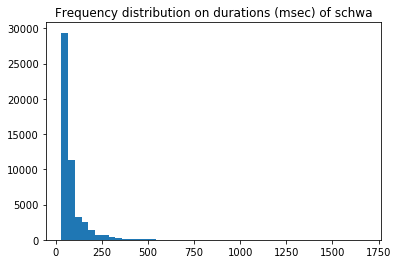

In [102]:
# Statistic data on durations of German schwa
print("Total occurences: " + str(len(schwa_list)))
print("Minimum duration: " + str(round(min(schwa_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(schwa_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(schwa_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(schwa_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(schwa_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(schwa_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(schwa_list)*0.0000625, 2)) + " sec")

# Histogram of durations of schwa
schwa_msec = [ x*0.0625 for x in schwa_list]
plt.hist(schwa_msec, bins = 45)
plt.title("Frequency distribution on durations (msec) of schwa")
plt.show()

Total occurences: 49488
Minimum duration: 0.03 sec
Maximum duration: 0.44 sec
Q1: 0.04 sec
Mean duration: 0.08 sec
Median duration: 0.06 sec
Q3: 0.09 sec
Standard deviation: 0.06 sec


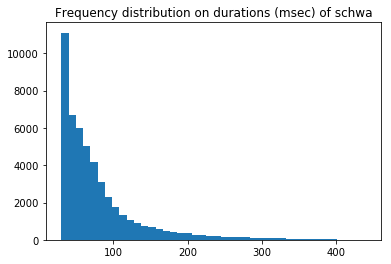

In [100]:
# Statistic data on durations of German schwa
# Eliminated upper and lower 1% datapoints
print("Total occurences: " + str(len(schwa1_list)))
print("Minimum duration: " + str(round(min(schwa1_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(schwa1_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(schwa1_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(schwa1_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(schwa1_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(schwa1_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(schwa1_list)*0.0000625, 2)) + " sec")

# Histogram of durations of schwa
schwa1_msec = [ x*0.0625 for x in schwa1_list]
plt.hist(schwa1_msec, bins = 42)
plt.title("Frequency distribution on durations (msec) of schwa")
plt.show()

<u><big> Schwa, one at a time:</big></u>

Statistics for /@/

Total occurencies of @: 20689
Count of outliers (1.0%) = 206
Longest 10 durations:
[999.94, 1019.94, 1019.94, 1039.94, 1089.94, 1149.94, 1259.94, 1299.94, 1449.94, 1669.94]

Consolidating statistic data on @ for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:       20689               20277       20483        15517
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.04                0.04        0.04         0.03
3       Mean:        0.08                0.08        0.08         0.05
4     Median:        0.05                0.05        0.05         0.04
5        Q75:        0.09                0.09        0.09         0.06
6  Max value:        1.67                0.44        0.44         0.09
7   Std. dev:        0.08                0.06        0.06         0.02


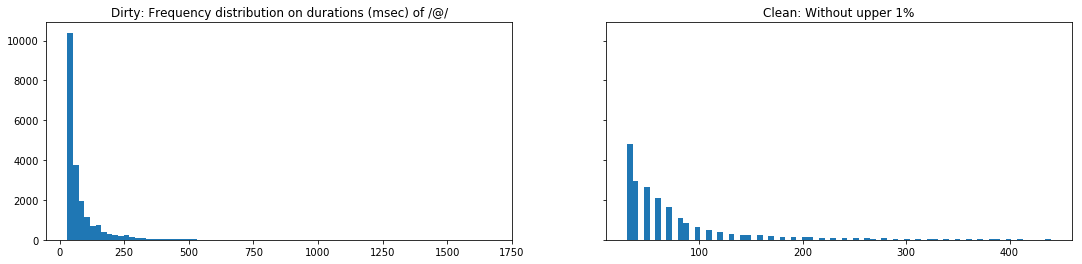

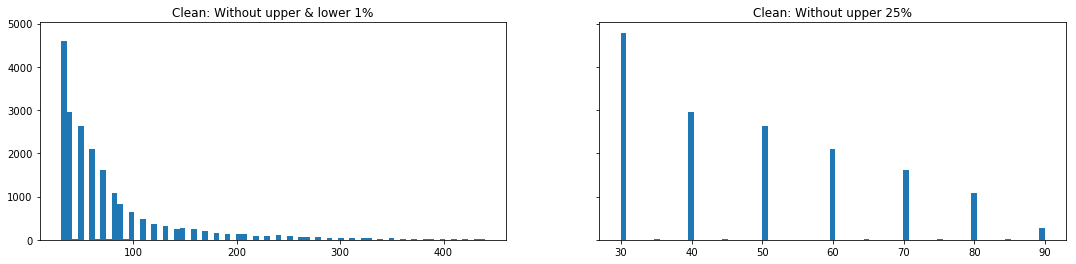

Statistics for /6/

Total occurencies of 6: 29807
Count of outliers (1.0%) = 298
Longest 10 durations:
[879.94, 969.94, 999.94, 1079.94, 1139.94, 1269.94, 1299.94, 1339.94, 1519.94, 1679.94]

Consolidating statistic data on 6 for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:       29807               29211       29509        22356
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.04                0.04        0.04         0.03
3       Mean:        0.08                0.07        0.07         0.05
4     Median:        0.06                0.06        0.06         0.05
5        Q75:        0.09                0.09        0.09         0.06
6  Max value:        1.68                0.35        0.35         0.09
7   Std. dev:        0.07                0.05        0.05         0.02


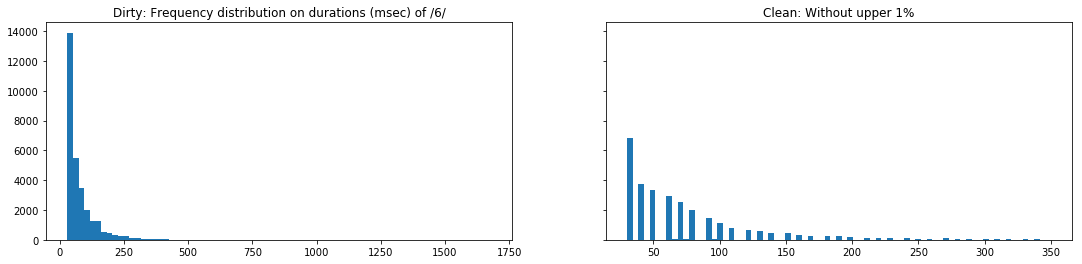

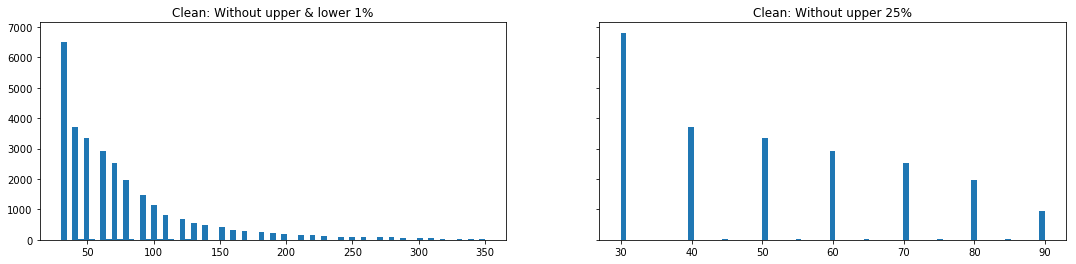

In [23]:
for schwa in ["@", "6"]:
    print("Statistics for /" + schwa + "/\n")
    # List of all occurencies of given schwa phoneme
    dur_list = phon_dur_dict[schwa][::2]
    dur_list = [round(x*0.0625,2) for x in dur_list]
    print("Total occurencies of " + schwa + ": " + str(len(dur_list)))
    
    # Counting 1% of data (for outliers)
    dur_sorted = sorted(dur_list)
    outliers1 = int(len(dur_list)*1.0//100)
    print("Count of outliers (1.0%) = " + str(outliers1) + "\nLongest 10 durations:")
    print(dur_sorted[-10:])
    # List of durations without the upper 1% of the data
    dur_minus1 = dur_sorted[:len(dur_list)-outliers1]
    
    # List of durations without upper and lower 1% of data (see no change to deleting only upper 1%)
    dur_uplow1 = dur_sorted[outliers1:len(dur_list)-outliers1]
    
    # Counting 25% of datapoints
    count25 = int(len(dur_list)*25//100)
    
    # List of durations without upper 25% of data
    dur75 = dur_sorted[:len(dur_list)-count25]
    
    # Consolidating statistic data on each diphthong for different amounts of data
    print("\nConsolidating statistic data on " + schwa + " for different amounts of data.\nValues are given in seconds.")
    df = pd.DataFrame({
        'Data:': ["Count:", "Min value:", "Q25:", "Mean:", "Median:", "Q75:", "Max value:", "Std. dev:"],
        'Dirty (all)':[str(len(dur_list)), round(min(dur_list)/1000, 2), round(np.percentile(dur_list, 25)/1000, 2), 
                       round(np.mean(dur_list)/1000, 2), round(np.median(dur_list)/1000, 2), 
                       round(np.percentile(dur_list, 75)/1000, 2), round(max(dur_list)/1000, 2), 
                       round(np.std(dur_list)/1000, 2)],
        "No upper 1%":[str(len(dur_minus1)), round(min(dur_minus1)/1000, 2), round(np.percentile(dur_minus1, 25)/1000, 2), 
                       round(np.mean(dur_minus1)/1000, 2), round(np.median(dur_minus1)/1000, 2), 
                       round(np.percentile(dur_minus1, 75)/1000, 2), round(max(dur_minus1)/1000, 2), 
                       round(np.std(dur_minus1)/1000, 2)], 
        "No upper & lower 1%":[str(len(dur_uplow1)), round(min(dur_uplow1)/1000, 2), 
                               round(np.percentile(dur_uplow1, 25)/1000, 2), round(np.mean(dur_uplow1)/1000, 2), 
                               round(np.median(dur_uplow1)/1000, 2), round(np.percentile(dur_uplow1, 75)/1000, 2), 
                               round(max(dur_uplow1)/1000, 2), round(np.std(dur_uplow1)/1000, 2)], 
        "No upper 25%":[str(len(dur75)), round(min(dur75)/1000, 2), round(np.percentile(dur75, 25)/1000, 2), 
                        round(np.mean(dur75)/1000, 2), round(np.median(dur75)/1000, 2), 
                        round(np.percentile(dur75, 75)/1000, 2), round(max(dur75)/1000, 2), round(np.std(dur75)/1000, 2)]})
    df.style
    print(df)
    
    # Creating histograms for the 4 types of data selection for each diphthong
    f1, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.hist(dur_list, bins = 75)
    ax1.set_title("Dirty: Frequency distribution on durations (msec) of /" + schwa + "/")
    ax2.hist(dur_minus1, bins = 75)
    ax2.set_title("Clean: Without upper 1%")
    f1.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=3)
    
    f2, (ax3, ax4) = plt.subplots(1, 2, sharey=True)
    ax3.hist(dur_uplow1, bins = 75)
    ax3.set_title("Clean: Without upper & lower 1%")
    ax4.hist(dur75, bins = 75)
    ax4.set_title("Clean: Without upper 25%")
    f2.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=3)
    
    plt.show()

### 4. Short vowels
<strong>2.1 German short vowels: /a/, /a~/, /e/, /E/, /i/, /I/, /o/, /O/, /u/, /U/, /y/, /Y/, /9/, and /2/</strong>

<i>Overall statistics</i>

In [24]:
# List of durations for /a/, /a~/, /e/, /E/, /i/, /I/, /o/, /O/, /u/, /U/, /y/, /Y/, /9/, and /2/.
shortv_list = []
for shortv in ptype_dict["short_vowels"]:
    shortv_list += phon_dur_dict[shortv][::2]
print("Total occurencies of short vowels: " + str(len(shortv_list)))

Total occurencies of short vowels: 95743


In [103]:
# Eliminate upper and lower 1% datapoints
shortv1_list = []
for sv in ptype_dict["short_vowels"]:
    svls = sorted(phon_dur_dict[sv][::2])
    out = int(len(svls)*1.0//100)
    shortv1_list += svls[out:len(svls)-out]
print("Total occurencies of short vowels: " + str(len(shortv1_list)))

Total occurencies of short vowels: 93839


Total short vowels: 95743
Minimum duration: 0.03 sec
Maximum duration: 1.16 sec
Q1: 0.04 sec
Mean duration: 0.07 sec
Median duration: 0.06 sec
Q3: 0.08 sec
Standard deviation: 0.04 sec


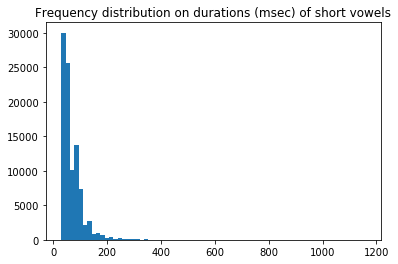

In [32]:
# Statistic data on durations of German short vowels
print("Total short vowels: " + str(len(shortv_list)))
print("Minimum duration: " + str(round(min(shortv_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(shortv_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(shortv_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(shortv_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(shortv_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(shortv_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(shortv_list)*0.0000625, 2)) + " sec")

# Histogram of short vowel duration
shortv_msec = [ x*0.0625 for x in shortv_list]
plt.hist(shortv_msec, bins = 70)
plt.title("Frequency distribution on durations (msec) of short vowels")
plt.show()

Total short vowels: 93839
Minimum duration: 0.03 sec
Maximum duration: 0.35 sec
Q1: 0.04 sec
Mean duration: 0.07 sec
Median duration: 0.06 sec
Q3: 0.08 sec
Standard deviation: 0.03 sec


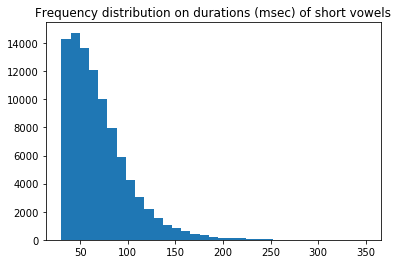

In [109]:
# Statistic data on durations of German short vowels
# Eliminated upper and lower 1% datapoints
print("Total short vowels: " + str(len(shortv1_list)))
print("Minimum duration: " + str(round(min(shortv1_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(shortv1_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(shortv1_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(shortv1_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(shortv1_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(shortv1_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(shortv1_list)*0.0000625, 2)) + " sec")

# Histogram of short vowel duration
shortv1_msec = [ x*0.0625 for x in shortv1_list]
plt.hist(shortv1_msec, bins = 33)
plt.title("Frequency distribution on durations (msec) of short vowels")
plt.show()

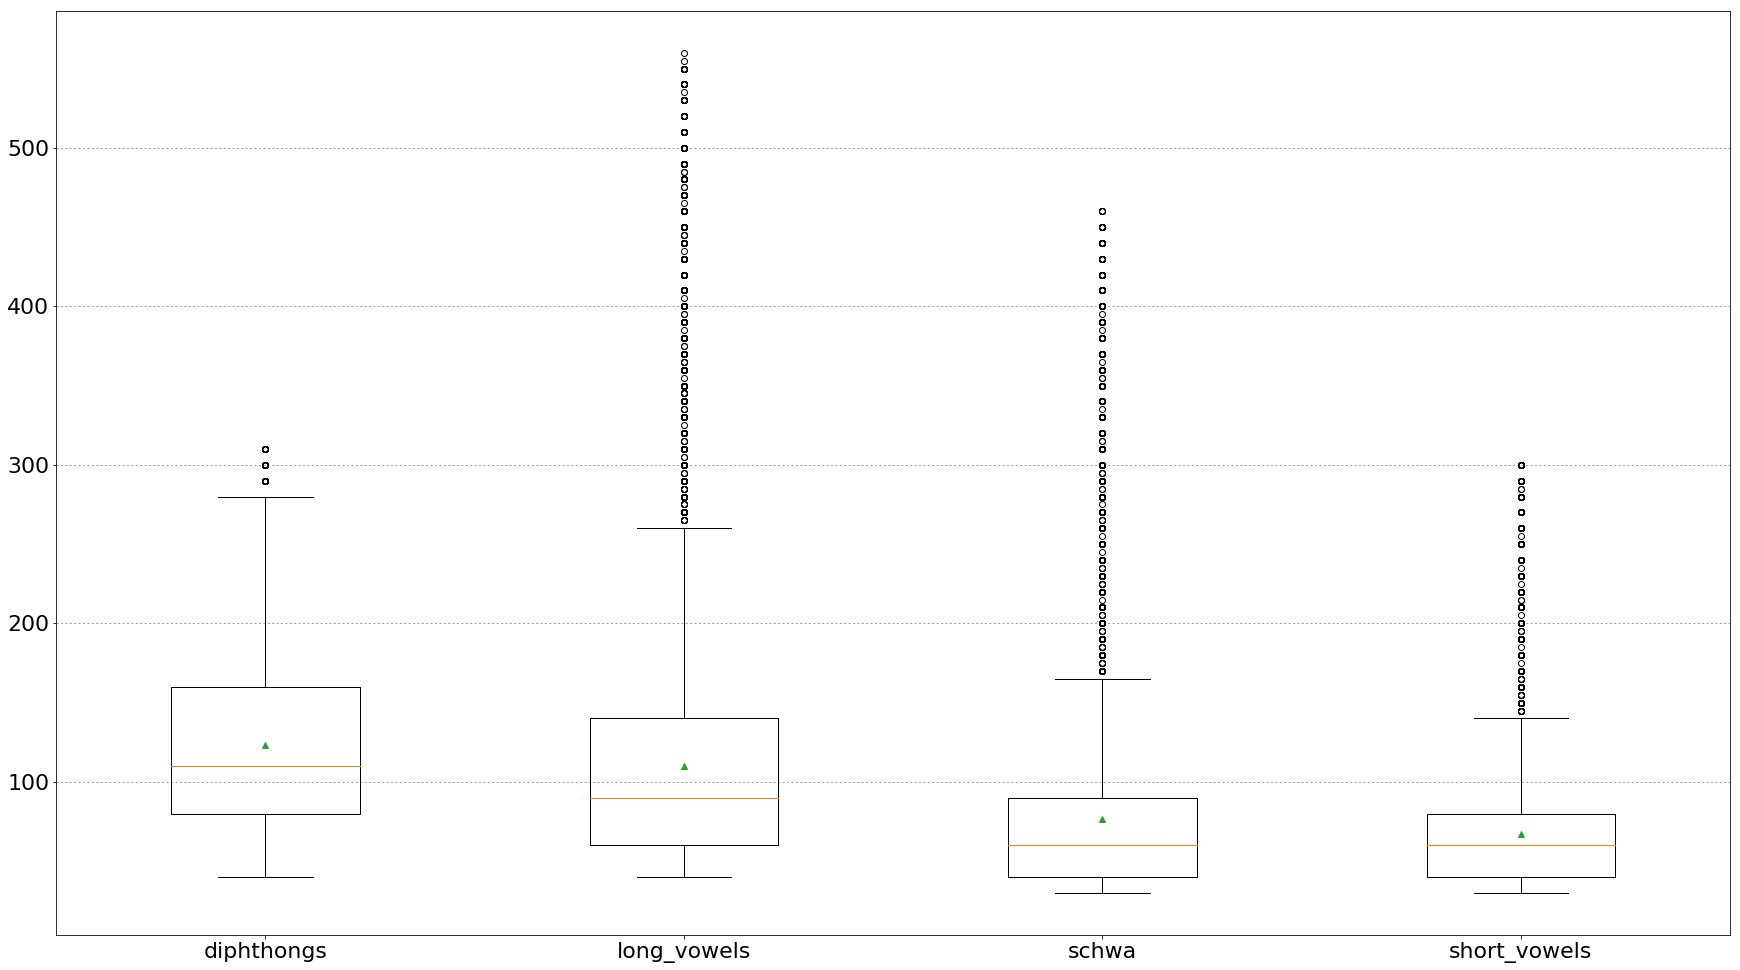

In [42]:
# Create a boxplot overview for the major vowel classes
# Eliminated upper and lower 1% of the datapoints
vow_list = []
for el in [diph_msec, longw_msec, schwa_msec, shortv_msec]:
    el = sorted(el)
    outliers = int(len(dur_list)*1.0//100)
    vow_list.append(el[outliers:len(el)-outliers])

lab_list = ["diphthongs", "long_vowels", "schwa", "short_vowels"]

plt.figure(figsize=(30, 17))
plt.grid(True, which='major', axis="y", color='gray', linestyle=':', linewidth=0.7)
plt.boxplot(vow_list, labels = lab_list, showmeans=True)
plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=22)
plt.savefig(fig_path+"/cmp_vowel_classes.png", format="png")
plt.show()